[0.011      0.0109375  0.01029412 0.00972222 0.00921053 0.009
 0.009      0.00926262 0.01062346 0.0126     0.0126     0.01062346
 0.00926262 0.009      0.009      0.009      0.009      0.009
 0.009      0.009     ]
[0.02739032 0.02918081 0.0309713  0.03276179 0.03455229 0.03634278
 0.03813327 0.03992377 0.04171426 0.04350475 0.04529525 0.04708574
 0.04887623 0.04851024 0.04687622 0.04544646 0.0441849  0.04306352
 0.04206017 0.04115717]
[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.0102918  0.01180385 0.014      0.014      0.01180385
 0.0102918  0.01       0.01       0.01       0.01       0.01
 0.01       0.01      ]
[1.1        1.09375    1.02941176 0.97222222 0.92105263 0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9       ]


c:\Conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


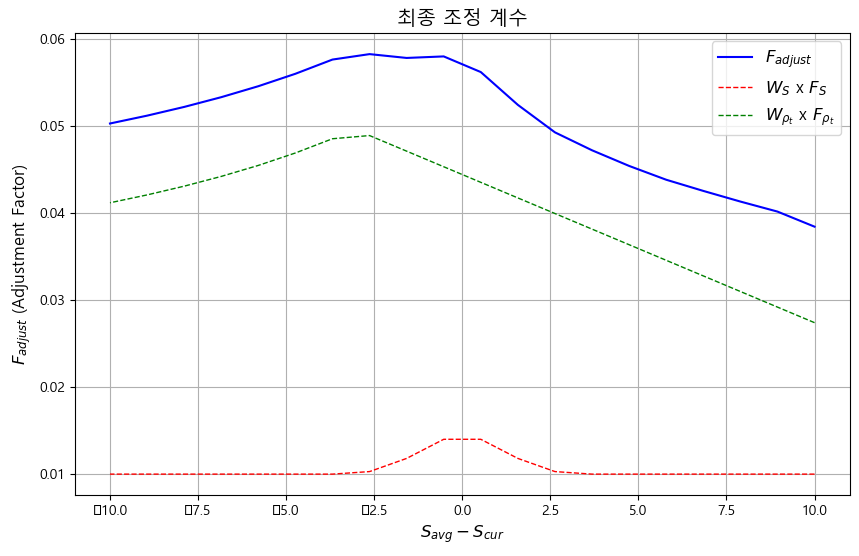

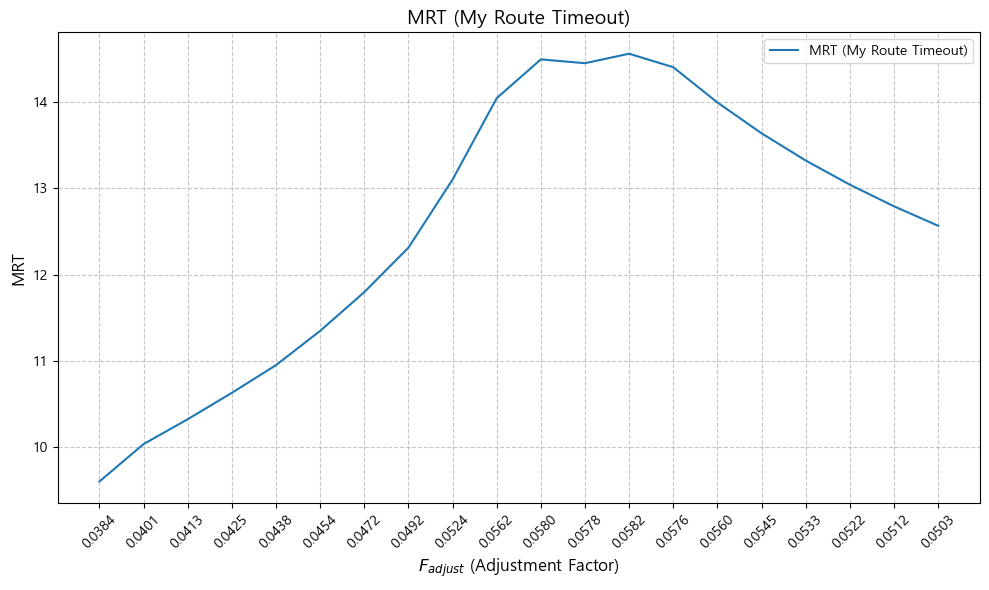

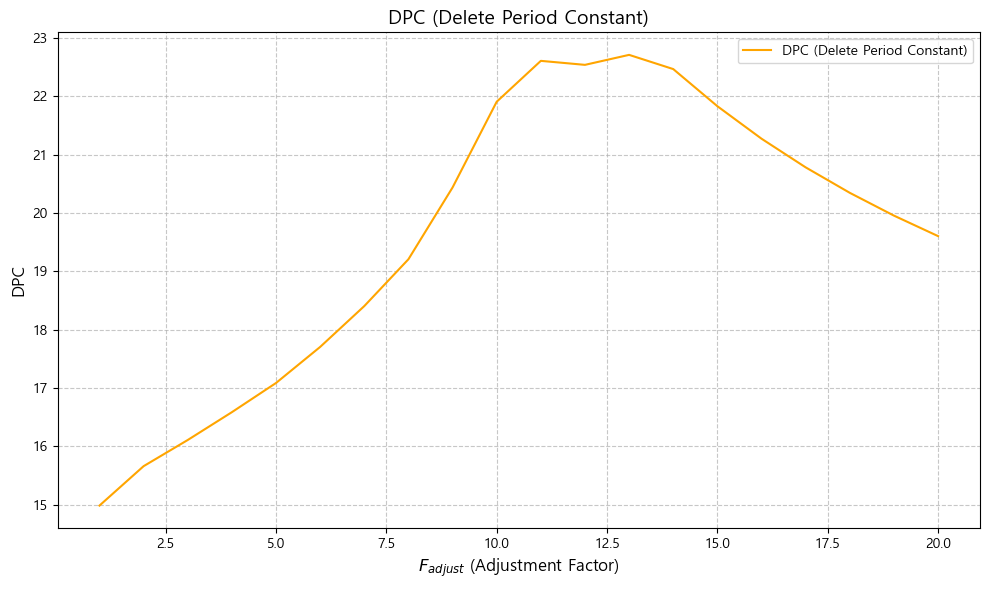

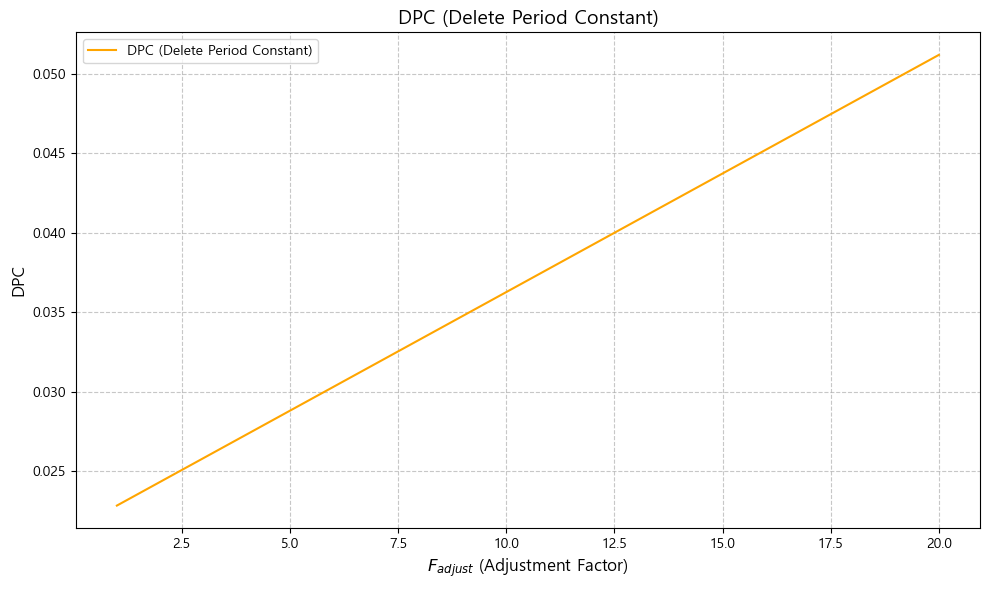

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

MRT_min = 5.0
MRT_max = 300.0
MRT_base = 250.0


DPC_min = 5.0
DPC_max = 500.0
DPC_base = 390.0


R = 0.8
N_t = np.arange(1, 21)
rho_t = N_t / (np.pi * R**2)
S_prev = np.arange(10, 70, 2)
S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)

S_cur = np.arange(30, 70, 2)
adjustment = np.linspace(10, -10, len(S_cur))
S_prev = S_cur + adjustment

S_avg = np.mean(S_cur)
delta_S = np.where(S_prev != 0, 1 - (np.abs(S_cur - S_prev) / S_prev), 0)

W_base_rho = 0.037
W_base_S = 0.037
F_change = -0.03
F_rho = 0.003

W_min = 0.01
W_max = 0.10


rho_t_avg = np.mean(rho_t)
F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur)) 

diff = np.linspace(10, - 10, len(S_cur))


W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum(np.abs(S_cur - S_avg) * -0.003, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)


W_S = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur - S_avg)) * -0.003, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S * -0.03, 0.02)
    ),
    W_min, W_max
)

F_rho_t = np.maximum(0.8, np.minimum(1.2, 8.0 / rho_t))

F_inter = 1.0 + (W_rho_t - W_S) * 0.05
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter

print(W_S * F_S)
print(W_rho_t * F_rho_t)

print(W_S)
print(F_S)

a = W_S
b = W_rho_t * F_rho_t

plt.figure(figsize=(10, 6))
plt.plot(diff, F_adjust, label="$F_{adjust}$", color="blue")

plt.plot(diff, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(diff, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)

plt.title("최종 조정 계수", fontsize=14)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)')

plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_t, DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

